<h1 align="center">Check Questions (20%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1** Опишите ситуацию (аргументированно), в котором композиция Adaptive Selection будет прогнозировать хуже, чем лучший из базовых алгоритмов.

<Ответ>

**Вопрос 2**  Опишите ситуацию (аргументированно), в котором композиция Adaptive Composition будет прогнозировать хуже, чем лучший из базовых алгоритмов.

<Ответ>

**Вопрос 3** Что значит смешиваемость (mixability) игры (в теории агрегирующего алгоритма)?

<Ответ>

**Вопрос 4**: Верно ли, что для смешиваемых игр процесс потерь любой композиции (любого алгоритма) будет расти со временем (с ростом $t$) не быстрее, чем процесс потерь лучшего из базовых алгоритмов? Если нет - приведит пример, когда это не так.

### $$ \mathrm{Loss}_{Composition}(T)\leq \inf\limits_{BA} \mathrm{Loss}_{BA}(T)+C$$

<Ответ>

<h1 align="center">2. Contest: electricity comsumption contest (80%)</h1>
Take part in <a href='https://www.kaggle.com/t/de102b28cae74e6ead7492ff12efbc63'>contest</a>.
<span style='color:red'> You need to send the final code that is used for building forecast.</span>

In [1]:
import pandas as pd

In [2]:
import xgboost

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
import catboost

In [4]:
(catboost + xgboost) / 2.

TypeError: unsupported operand type(s) for +: 'module' and 'module'

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import pandas as pd

In [5]:
sample = pd.read_csv('../SubmissionSample.csv')

In [7]:
sample.head(10)

,ID,PREDICTED
0,16707,100000
1,16708,100000
2,16709,100000
3,16710,100000
4,16711,100000
5,16712,100000
6,16713,100000
7,16714,100000
8,16715,100000
9,16716,100000


In [8]:
dotaset = pd.read_csv('./train.csv')

In [9]:
dotaset.head()

,ID,Date,tsID,ACTUAL,Temp,Saturday,Sunday
0,1,01.01.2010,4,35489.95,-0.9,0.0,1
1,2,02.01.2010,4,35413.59,-0.1,1.0,0
2,3,03.01.2010,4,34802.67,-3.9,0.0,1
3,4,04.01.2010,4,36003.84,-13.7,0.0,1
4,5,05.01.2010,4,37622.96,-16.9,0.0,1


In [12]:
cur_ids = []
for i in range(1, 23):
    cur_dotaset = (dotaset[dotaset['tsID'] == i]).tail(30)
    cur_ids += list(cur_dotaset['ID'])

In [14]:
import numpy as np

In [15]:
fst = np.array(cur_ids)
snd = np.array(list(sample['ID']))

In [24]:
to_ts_id = []
for ind in sample['ID']:
    to_ts_id.append(dotaset[dotaset['ID'] == ind]['tsID'].values[0])

In [31]:
to_ts_id

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,


In [32]:
great = list(range(1, 17)) + list(range(18, 23)) + [17]

In [80]:
datasets = []
for i in great:
    cur_ = pd.read_csv('../pred_arima{}.csv'.format(i))
    datasets.append(cur_)

In [81]:
len(datasets)

22

In [82]:
answer = []
for cur_dataset in datasets:
    to_push = list(cur_dataset['Point.Forecast'].values)
    answer += to_push

In [83]:
len(answer)

660

In [84]:
from copy import deepcopy

In [85]:
final_subm = deepcopy(sample)

In [86]:
final_subm['PREDICTED'] = answer

In [87]:
final_subm.to_csv('final_subm_new_new_LAST_arima.csv',index=False)

In [69]:
jffjsdfjsa = pd.read_csv('final_subm_new.csv')

In [38]:
len(datasets[0]['Point.Forecast'].values)

30

In [25]:
to_ts_id

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,


In [18]:
fst - snd

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [16]:
np.array_equal(fst, snd)

False

In [13]:
len(cur_ids)

660

In [10]:
dotaset[dotaset['ID'] == 16709]

,ID,Date,tsID,ACTUAL,Temp,Saturday,Sunday
16460,16709,03.11.2012,1,NaN,-5.0,1.0,0


In [7]:
datetime.datetime.strptime('2017-08-11', "%Y-%m-%d")

NameError: name 'datetime' is not defined

In [8]:
datetime.datetime.strptime('01.01.2010', "%d.%m.%Y")

NameError: name 'datetime' is not defined

In [11]:
import datetime

In [12]:
def parser(elem):
    return datetime.datetime.strptime(elem, "%d.%m.%Y")

In [13]:
data = pd.read_csv('/Users/semenfedotov/Desktop/GitHub/ML_MIPT_PART_2/HW3/train.csv',
                    index_col=0, parse_dates=['Date'], date_parser=parser)

In [14]:
data.shape

(21207, 6)

In [94]:
data.head()

,Date,tsID,ACTUAL,Temp,Saturday,Sunday
ID,,,,,,
1,2010-01-01,4,35489.95,-0.9,0.0,1
2,2010-01-02,4,35413.59,-0.1,1.0,0
3,2010-01-03,4,34802.67,-3.9,0.0,1
4,2010-01-04,4,36003.84,-13.7,0.0,1
5,2010-01-05,4,37622.96,-16.9,0.0,1


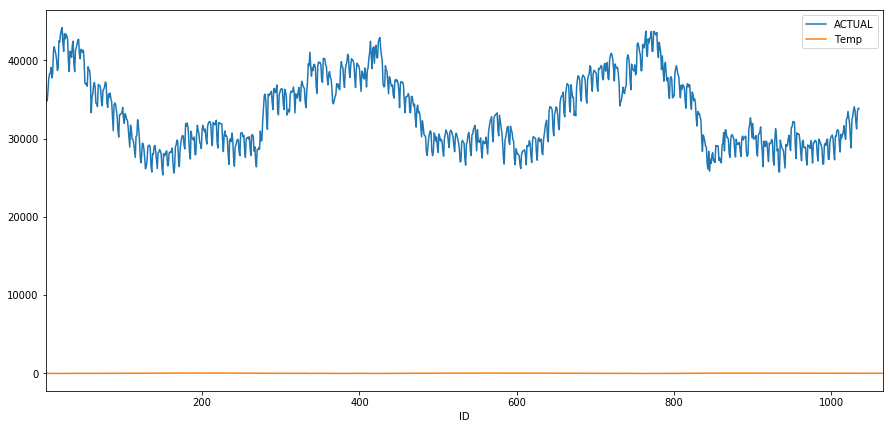

In [17]:
data[data['tsID'] == 4][['Date', 'ACTUAL', 'Temp']].plot(figsize=(15,7))
plt.show()

In [19]:
data[data['Date'] == '2010-01-01']

,Date,tsID,ACTUAL,Temp,Saturday,Sunday
ID,,,,,,
1,2010-01-01,4,35489.95,-0.9,0.0,1
1097,2010-01-01,15,34904.00,6.2,0.0,1
1960,2010-01-01,5,133467.00,9.6,0.0,1
3056,2010-01-01,16,146714.00,6.0,0.0,1
3918,2010-01-01,10,259997.00,0.1,0.0,1
5014,2010-01-01,21,237476.00,10.0,0.0,1
5877,2010-01-01,11,366448.00,-10.0,0.0,1
6973,2010-01-01,22,407219.00,13.0,0.0,1
7836,2010-01-01,6,13442.00,-8.8,0.0,1


In [1]:
data

NameError: name 'data' is not defined

In [ ]:
temperatura = 

In [96]:
import statsmodels
import statsmodels.api as sm

In [111]:
tezt = data[data['tsID'] == 4][['Date', 'ACTUAL']]
tezt.index = tezt['Date']

In [112]:
tezt = tezt['ACTUAL'].to_frame()

In [113]:
tezt.shape

(1065, 1)

In [114]:
tezt.dropna().shape

(1035, 1)

In [115]:
tezt = tezt.head(1035)

In [116]:
qqq = tezt.index

In [117]:
tezt.index.freq

In [118]:
tezt.values[:,0]

array([ 35489.95,  35413.59,  34802.67, ...,  33454.83,  33894.82,
        33838.25])

In [ ]:
# Put your code for 
final_forecast = ???

In [80]:
# save forecast to disk for further submission
final_forecast.save('result.csv', format='csv')